In [1]:
# Useful for debugging
%load_ext autoreload
%autoreload 2

# Functional LUME-Astra examples

This is the functional way to run astra and return the evaluate Astra object, or simple dict of outputs

Settings is a list of settings that can appear in the input file.

In [2]:
from astra import run_astra, run_astra_with_generator, template_dir

import matplotlib.pyplot as plt
import os

In [3]:
# Input template file 
ASTRA_IN = os.path.join(template_dir, 'dcgun/astra.in')

In [4]:
settings0 = {'zstop':1, 'zemit':200, 'zphase':1, 'phases':True}

# Just run astra
A1 = run_astra(settings0, astra_input_file=ASTRA_IN, verbose=True, timeout=100)

run_astra
zstop is in astra newrun
zemit is in astra newrun
zphase is in astra newrun
phases is in astra newrun
Linked /Users/chrisonian/Code/GitHub/lume-astra/templates/dcgun/generator.part to /var/folders/wj/lfgr01993dx79p9cm_skykbw0000gn/T/tmpjjwlwxdl/generator.part
Linked /Users/chrisonian/Code/GitHub/lume-astra/templates/dcgun/dcgun_GHV.dat to /var/folders/wj/lfgr01993dx79p9cm_skykbw0000gn/T/tmpjjwlwxdl/dcgun_GHV.dat
Linked /Users/chrisonian/Code/GitHub/lume-astra/templates/dcgun/solenoid_SLA_L60.dat to /var/folders/wj/lfgr01993dx79p9cm_skykbw0000gn/T/tmpjjwlwxdl/solenoid_SLA_L60.dat
loading 1 particle files
[100.0]
{'start_time': 1617033566.451154, 'run_script': '/Users/chrisonian/Code/astra/bin/Astra astra.in', 'why_error': '', 'run_time': 1.588235855102539, 'run_error': False}


In [5]:
GENERATOR_IN = os.path.join(template_dir, 'dcgun/generator.in')

# Run Astra with Generator
settings0['ipart']= 2000

A2 = run_astra_with_generator(settings0, astra_input_file=ASTRA_IN,
                              generator_input_file=GENERATOR_IN, verbose=True)

run_astra_with_generator
zstop is in astra newrun
zemit is in astra newrun
zphase is in astra newrun
phases is in astra newrun
ipart is in generator
set spacecharge mesh for n_particles: 2000 to {'nrad': 10, 'nlong_in': 20}
 --------------------------------------------------------------------------

                              generator              
                             Version 1.0             
                        DESY,  Hamburg 2002          
                        Mon Mar 29 08:59:28 

     Working File is:    generator.in                                      
     Initializing       2000      electrons
     including 6 probe particles at standard positions
     Particles start from a cathode
     Particles are quasi randomly distributed

          Energy spread too high.
                  46 times standard correction procedure



     Final check:
     Particles taken into account      N =       2000
     total charge                      Q =    -0.1000     nC
     h

In [6]:
from astra.astra_distgen import run_astra_with_distgen
DISTGEN_IN = os.path.join(template_dir, 'dcgun/distgen.yaml')

# Run Astra with Distgen
settings0 = {'zstop':1, 'zemit':200, 'zphase':1, 'phases':True}
settings0['distgen:n_particle'] = 2000

A3 = run_astra_with_distgen(settings0, astra_input_file=ASTRA_IN,
                              distgen_input_file=DISTGEN_IN, verbose=True)

run_astra_with_generator
zstop is in astra newrun
zemit is in astra newrun
zphase is in astra newrun
phases is in astra newrun
Setting distgen n_particle = 2000
Distribution format: None
Output file: None

Creating beam distribution....
   Beam starting from: cathode
   Total charge: 100 pC.
   Number of macroparticles: 2000.
   Assuming cylindrical symmetry...
   r distribution: radial uniform
      min_r = 0 mm, max_r = 0.5 mm
   theta distribution: uniform theta
      min_theta = 0 rad, max_theta = 6.28319 rad
   t distribution: Gaussian
      avg_t = 0 ps, sigma_t = 8.500 ps
      Left n_sigma_cutoff = 3, Right n_sigma_cutoff = -3
   px distribution: Gaussian
      avg_px = 0 eV/c, sigma_px = 357.421 eV/c
   py distribution: Gaussian
      avg_py = 0 eV/c, sigma_py = 357.421 eV/c
   pz distribution: Gaussian
      avg_pz = 0 eV/c, sigma_pz = 357.421 eV/c
   Shifting avg_x = -0.000182722 mm -> 0 mm
   Scaling sigma_x = 0.249836 mm -> 0.25 mm
   Shifting avg_y = -5.96585E-05 mm -> 0 

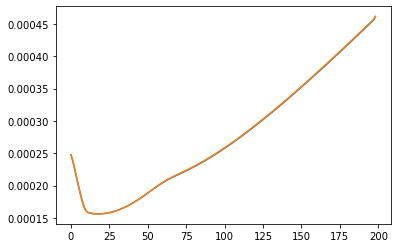

In [7]:
# These Generator and Distgen inputs are set up to produce nearly the same initial beams

plt.plot(A2.stat('sigma_x'))
plt.plot(A3.stat('sigma_x'))

# Evaluate functions

For scans an optimizations, a user often wants to run a simulation many times and examine some particular output. The package provides several `evaluate_` functions that are similar to the `run_` functions above, but apply some merit function to the output and returns that. Additionally, if an `archive_path` is provided, the `.archive` method will be called to save the complete object output

In [8]:
# This is the default merit function that is applied. The user can supply a different function if needed.

from astra.evaluate import default_astra_merit

default_astra_merit(A2)

{'error': False,
 'end_mean_z': 1.0,
 'end_mean_t': 4.0153e-09,
 'end_mean_x': 6.1453e-09,
 'end_sigma_x': 0.00046093,
 'end_sigma_xp': 0.00051108,
 'end_norm_emit_x': 1.7455e-07,
 'end_cov_x__xp': 2.1221217199999998e-07,
 'end_mean_y': 3.9381999999999995e-08,
 'end_sigma_y': 0.00046181,
 'end_sigma_yp': 0.0005110700000000001,
 'end_norm_emit_y': 1.7527e-07,
 'end_cov_y__yp': 2.125018715e-07,
 'end_mean_kinetic_energy': 499790.0,
 'end_sigma_z': 0.0021705,
 'end_sigma_energy': 1.5773,
 'end_norm_emit_z': 0.0034225,
 'end_cov_z__energy': 7.868713650000001e-05,
 'end_n_particle_loss': 0,
 'end_total_charge': 9.995e-11,
 'end_higher_order_energy_spread': 1.576731717424839}

# evaluate_astra_with_generator

In [9]:
# An even simpler run, returns a simple dict of outputs. For use in optimization
from astra import evaluate_astra_with_generator

MY_GENERATOR_TEMPLATE = os.path.join(template_dir, 'dcgun/generator.in')

# Run Astra with Generator
# Run Astra with Generator
settings0 = {'zstop':1, 'zemit':200, 'zphase':1, 'phases':True}
settings0['ipart'] = 2000

outputs1 = evaluate_astra_with_generator(settings0, 
                                        astra_input_file=ASTRA_IN,
                                        generator_input_file=GENERATOR_IN,
                                        archive_path = '.')
outputs1

{'error': False,
 'end_mean_z': 1.0,
 'end_mean_t': 4.0153e-09,
 'end_mean_x': 6.1453e-09,
 'end_sigma_x': 0.00046093,
 'end_sigma_xp': 0.00051108,
 'end_norm_emit_x': 1.7455e-07,
 'end_cov_x__xp': 2.1221217199999998e-07,
 'end_mean_y': 3.9381999999999995e-08,
 'end_sigma_y': 0.00046181,
 'end_sigma_yp': 0.0005110700000000001,
 'end_norm_emit_y': 1.7527e-07,
 'end_cov_y__yp': 2.125018715e-07,
 'end_mean_kinetic_energy': 499790.0,
 'end_sigma_z': 0.0021705,
 'end_sigma_energy': 1.5773,
 'end_norm_emit_z': 0.0034225,
 'end_cov_z__energy': 7.868713650000001e-05,
 'end_n_particle_loss': 0,
 'end_total_charge': 9.995e-11,
 'end_higher_order_energy_spread': 1.576731717424839,
 'fingerprint': '845fe2f064cdab7440f45af91a786409',
 'archive': '/Users/chrisonian/Code/GitHub/lume-astra/examples/845fe2f064cdab7440f45af91a786409.h5'}

In [10]:
# The archive can be loaded into a clean object.
from astra import Astra
AX = Astra()
AX.load_archive(outputs1['archive'])

# Check the merit
default_astra_merit(AX)

{'error': False,
 'end_cov_x__xp': 2.1221217199999998e-07,
 'end_cov_y__yp': 2.125018715e-07,
 'end_cov_z__energy': 7.868713650000001e-05,
 'end_mean_kinetic_energy': 499790.0,
 'end_mean_t': 4.0153e-09,
 'end_mean_x': 6.1453e-09,
 'end_mean_y': 3.9381999999999995e-08,
 'end_mean_z': 1.0,
 'end_norm_emit_x': 1.7455e-07,
 'end_norm_emit_y': 1.7527e-07,
 'end_norm_emit_z': 0.0034225,
 'end_sigma_energy': 1.5773,
 'end_sigma_x': 0.00046093,
 'end_sigma_xp': 0.00051108,
 'end_sigma_y': 0.00046181,
 'end_sigma_yp': 0.0005110700000000001,
 'end_sigma_z': 0.0021705,
 'end_n_particle_loss': 0,
 'end_total_charge': 9.995e-11,
 'end_higher_order_energy_spread': 1.576731717424839}

In [11]:
# Cleanup
os.remove(outputs1['archive'])

# evaluate_astra_with_distgen

In [12]:
from astra import evaluate_astra_with_distgen

?evaluate_astra_with_distgen

Signature:
evaluate_astra_with_distgen(
    settings,
    astra_input_file=None,
    distgen_input_file=None,
    workdir=None,
    astra_bin='$ASTRA_BIN',
    timeout=2500,
    verbose=False,
    auto_set_spacecharge_mesh=True,
    archive_path=None,
    merit_f=None,
)
Docstring:
Similar to run_astra_with_distgen, but returns a flat dict of outputs as processed by merit_f. 

If no merit_f is given, a default one will be used. See:
    astra.evaluate.default_astra_merit

Will raise an exception if there is an error. 
File:      ~/Code/GitHub/lume-astra/astra/astra_distgen.py
Type:      function


In [13]:
# Run Astra with Distgen
settings5 = {'zstop':1, 'zemit':200, 'zphase':1, 'phases':True}
settings5['distgen:n_particle'] = 2000

outputs2 = evaluate_astra_with_distgen(settings5, astra_input_file=ASTRA_IN,
                              distgen_input_file=DISTGEN_IN, archive_path='.')
outputs2

{'error': False,
 'end_mean_z': 1.0,
 'end_mean_t': 4.0156e-09,
 'end_mean_x': 7.553300000000001e-11,
 'end_sigma_x': 0.0004619,
 'end_sigma_xp': 0.00051138,
 'end_norm_emit_x': 1.7514e-07,
 'end_cov_x__xp': 2.1275114000000003e-07,
 'end_mean_y': -3.6688e-09,
 'end_sigma_y': 0.00046157,
 'end_sigma_yp': 0.00051168,
 'end_norm_emit_y': 1.7457e-07,
 'end_cov_y__yp': 2.12876084e-07,
 'end_mean_kinetic_energy': 499790.0,
 'end_sigma_z': 0.0021695000000000004,
 'end_sigma_energy': 1.5373999999999999,
 'end_norm_emit_z': 0.0033353,
 'end_cov_z__energy': -2.1510375550000005e-05,
 'end_n_particle_loss': 0,
 'end_total_charge': 9.999999999999999e-11,
 'end_higher_order_energy_spread': 1.537349461792966,
 'fingerprint': '79f8c3d315262826ad98b819ddfbf1a7',
 'archive': '/Users/chrisonian/Code/GitHub/lume-astra/examples/79f8c3d315262826ad98b819ddfbf1a7.h5'}

In [14]:
from distgen import Generator

In [15]:
# Re-form the generator object
G = Generator()
G.load_archive(outputs2['archive'])
G

<disgten.Generator with input: 
n_particle: 2000
r_dist:
  max_r:
    units: mm
    value: 0.5
  type: radial_uniform
random_type: hammersley
start:
  MTE:
    units: meV
    value: 250
  type: cathode
t_dist:
  avg_t:
    units: ps
    value: 0
  n_sigma_cutoff: 3
  sigma_t:
    units: ps
    value: 8.5
  type: gaussian
total_charge:
  units: pC
  value: 100

>

In [16]:
# Note that there are no particles, this is just the input. 
# Particles are 
G.particles == None

True

In [17]:
# This will essentially recreate evaluate_astra_with_distgen
A = Astra(verbose=False)

A.load_archive(outputs2['archive'])

# Make particles
G.run()

A.initial_particles = G.particles
A.configure()
A.run()
default_astra_merit(A)

{'error': False,
 'end_mean_z': 1.0,
 'end_mean_t': 4.0156e-09,
 'end_mean_x': 7.553300000000001e-11,
 'end_sigma_x': 0.0004619,
 'end_sigma_xp': 0.00051138,
 'end_norm_emit_x': 1.7514e-07,
 'end_cov_x__xp': 2.1275114000000003e-07,
 'end_mean_y': -3.6688e-09,
 'end_sigma_y': 0.00046157,
 'end_sigma_yp': 0.00051168,
 'end_norm_emit_y': 1.7457e-07,
 'end_cov_y__yp': 2.12876084e-07,
 'end_mean_kinetic_energy': 499790.0,
 'end_sigma_z': 0.0021695000000000004,
 'end_sigma_energy': 1.5373999999999999,
 'end_norm_emit_z': 0.0033353,
 'end_cov_z__energy': -2.1510375550000005e-05,
 'end_n_particle_loss': 0,
 'end_total_charge': 9.999999999999999e-11,
 'end_higher_order_energy_spread': 1.537349461792966}

In [18]:
# Cleanup
os.remove(outputs2['archive'])

In [19]:
# Compare Generator, Distgen. Thee should be similar, but not exactly the same. 
for k in outputs1:
    print(k, outputs1[k], outputs2[k])

error False False
end_mean_z 1.0 1.0
end_mean_t 4.0153e-09 4.0156e-09
end_mean_x 6.1453e-09 7.553300000000001e-11
end_sigma_x 0.00046093 0.0004619
end_sigma_xp 0.00051108 0.00051138
end_norm_emit_x 1.7455e-07 1.7514e-07
end_cov_x__xp 2.1221217199999998e-07 2.1275114000000003e-07
end_mean_y 3.9381999999999995e-08 -3.6688e-09
end_sigma_y 0.00046181 0.00046157
end_sigma_yp 0.0005110700000000001 0.00051168
end_norm_emit_y 1.7527e-07 1.7457e-07
end_cov_y__yp 2.125018715e-07 2.12876084e-07
end_mean_kinetic_energy 499790.0 499790.0
end_sigma_z 0.0021705 0.0021695000000000004
end_sigma_energy 1.5773 1.5373999999999999
end_norm_emit_z 0.0034225 0.0033353
end_cov_z__energy 7.868713650000001e-05 -2.1510375550000005e-05
end_n_particle_loss 0 0
end_total_charge 9.995e-11 9.999999999999999e-11
end_higher_order_energy_spread 1.576731717424839 1.537349461792966
fingerprint 845fe2f064cdab7440f45af91a786409 79f8c3d315262826ad98b819ddfbf1a7
archive /Users/chrisonian/Code/GitHub/lume-astra/examples/845fe2